<a href="https://colab.research.google.com/github/paulxdillon/Chem-Eng/blob/master/Bioreactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model for penicilin using Bajpai & Reuss, J. Chem Tech. Biotechno, 1980

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

mumax = 0.20      # 1/hour
Ks = 1.00         # g/liter
Yxs = 0.5         # g/g
Ypx = 0.2         # g/g
Sf = 10.0         # g/liter

# inlet flowrate

def F(t):
    return 0.05

# reaction rates

def mu(S):
    return mumax*S/(Ks + S)

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# differential equations

def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs
    dV = F(t)
    return [dX,dP,dS,dV]

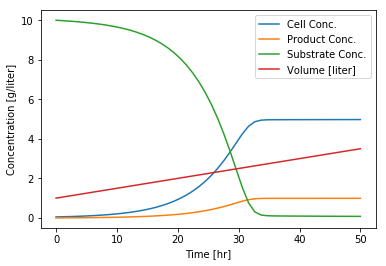

In [9]:
IC = [0.05, 0.0, 10.0, 1.0]

t = np.linspace(0,50)
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])